In [1]:
import numpy as np
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table

import sys
sys.path.append('../')

from uvot import filter_colors
from source_names_dict import source_names_dict, source_names_readable, source_distances_mpc, get_simbad_name_glob
pd.set_option('display.max_columns', None)

# XRT

In [2]:
df_obs_counts = pd.read_csv('../tables/XRT_obs_rates.csv')
df_obs_counts

,simbad_name,readable_name,OBS,UL,BAD,GOOD,FULL_mu,FULL_std,SOFT_mu,SOFT_std,HARD_mu,HARD_std,HR_mu,HR_std
0,ESO_243-49_HLX-1,ESO 243-49 HLX-1,626,416,546,80,0.029281,0.009471,0.027247,0.010349,0.001786,0.001755,0.078050,0.084158
1,[LM2005]_NGC_1042_ULX1,NGC1042 ULX-1,21,1,13,8,0.030968,0.008821,0.015691,0.005988,0.015680,0.004917,1.110604,0.583689
2,NAME_NGC_1365-X1,NGC1365 X-1,139,48,139,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[SK2009]_X2,NGC1365 X-2,139,48,139,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NAME_NGC_5907_ULX,NGC5907 ULX,578,221,501,77,0.030919,0.063277,0.013300,0.064371,0.017341,0.009745,2.985914,6.044517
5,NAME_NGC_7090_ULX3,NGC7090 ULX-3,34,15,34,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NAME_NGC_925_ULX-2,NGC925 ULX-2,98,7,59,39,0.016862,0.004159,0.007514,0.001782,0.009380,0.003886,1.349865,0.687518
7,NAME_NGC_925_ULX-1,NGC925 ULX-1,98,0,7,91,0.054006,0.028058,0.021601,0.010616,0.032588,0.018567,1.530447,0.498290
8,[LM2005]_NGC_4559_ULX1,NGC4559 ULX-1,117,1,8,109,0.042243,0.021806,0.027315,0.013931,0.015532,0.009871,0.603832,0.278847
9,[SST2011]_J141939.39+564137.8,NGC5585 ULX,16,3,14,2,0.015758,0.002114,0.005335,0.001543,0.010422,0.003656,2.142189,1.304907


In [3]:
df2 = df_obs_counts.set_index('readable_name')
df_rates_dim = df2[df2['FULL_mu'] < 0.25][['FULL_mu', 'SOFT_mu', 'HARD_mu']]
df_rates_err_dim = df2.loc[df_rates_dim.index][['FULL_std', 'SOFT_std', 'HARD_std']]
df_rates_dim.columns = ['FULL','SOFT','HARD']
df_rates_err_dim.columns = ['FULL','SOFT','HARD']

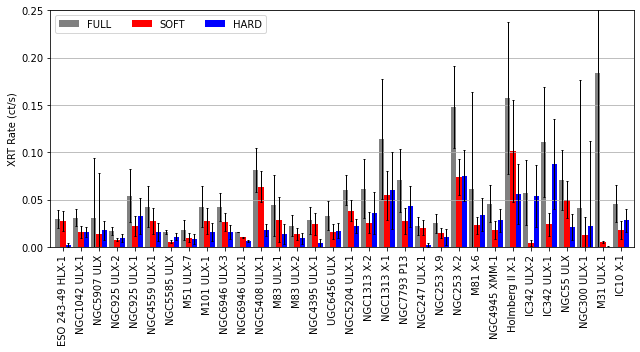

In [4]:
curve_colors = {'HARD' : 'blue',
                'SOFT' : 'red',
                'FULL' : 'grey'}

fig, ax = plt.subplots(1,1, figsize=(9,5))
df_rates_dim.plot.bar(ax=ax, yerr=df_rates_err_dim, color=curve_colors, width=0.9, rot=90, error_kw=dict(lw=1, capsize=1, capthick=1))
ax.grid(axis='y')
ax.set_ylim(0, 0.25)
ax.legend(loc='upper left', ncol=7)
ax.set_xlabel('')


ax.set_ylabel('XRT Rate (ct/s)')
plt.tight_layout()
plt.savefig('../figures/XRT_rates.png')
plt.savefig('../figures/XRT_rates.pdf')

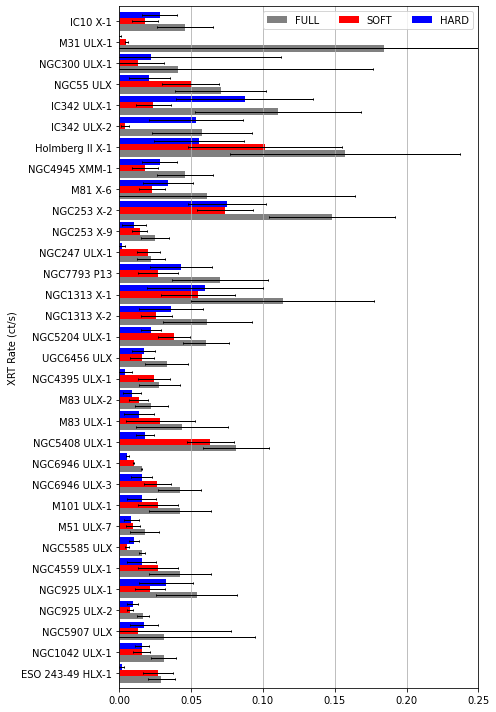

In [5]:
curve_colors = {'HARD' : 'blue',
                'SOFT' : 'red',
                'FULL' : 'grey'}

fig, ax = plt.subplots(1,1, figsize=(7,10))
df_rates_dim.plot.barh(ax=ax, xerr=df_rates_err_dim, color=curve_colors, width=0.9, rot=0, error_kw=dict(lw=1, capsize=1, capthick=1))
ax.grid(axis='x')
ax.set_xlim(0, 0.25)
ax.legend(loc='upper right', ncol=7)
#ax.set_xlabel('')


ax.set_ylabel('XRT Rate (ct/s)')
plt.tight_layout()
plt.savefig('../figures/XRT_rates_vert.png')
plt.savefig('../figures/XRT_rates_vert.pdf')

# UVOT

## Calculate number of observations in each band, and number of detections, as well as average fluxes

In [6]:
rows = []  # For storing obs counts
rows2 = [] # For storing fluxes (latex)
rows3 = [] # For storing fluxes (numerical)

for simbad_name, readable_name in source_names_readable.items():
    simbad_name_glob = get_simbad_name_glob(simbad_name)
    files = glob(f'../lightcurves/uvot/*{simbad_name_glob}*')
    
    #ow = {'simbad_name': simbad_name, 'readable_name':readable_name, 'uvot_filter': uvot_filter}
    row   = {'simbad_name': simbad_name, 'readable_name':readable_name}
    row2  = {'simbad_name': simbad_name, 'readable_name':readable_name}
    row3  = {'simbad_name': simbad_name, 'readable_name':readable_name}
    
    for f in files:
        uvot_filter = f.split('/')[-1][:-5].split(',')[1].split('_')[1]
        tab = Table.read(f)

        n_obs = len(np.unique(tab['OBSID']))
        n_det = np.sum((tab['NSIGMA'] > 3))
        
        rate_mu  = np.mean(tab['COI_SRC_RATE'])
        rate_std = np.std(tab['COI_SRC_RATE'])
        
        row[f'{uvot_filter}']      = f'{n_obs} ({n_det})'
        row2[f'{uvot_filter}']     = f'{rate_mu:.2f} $\pm$ {rate_std:.2f}'
        row3[f'{uvot_filter}_mu']  = rate_mu
        row3[f'{uvot_filter}_std'] = rate_std
    rows.append(row)
    rows2.append(row2)
    rows3.append(row3)

df_uvot_counts = pd.DataFrame(rows)
df_uvot_counts = df_uvot_counts.set_index('simbad_name').loc[list(source_distances_mpc.keys())]

df_uvot_rates = pd.DataFrame(rows2)
df_uvot_rates = df_uvot_rates.set_index('simbad_name').loc[list(source_distances_mpc.keys())]

df_uvot_rates2 = pd.DataFrame(rows3)
df_uvot_rates2 = df_uvot_rates2.set_index('simbad_name').loc[list(source_distances_mpc.keys())]


In [7]:
df_uvot_counts.fillna(0).reset_index()[['readable_name', 'U', 'B', 'V', 'UVM2', 'UVW1', 'UVW2', 'WHITE']].to_latex('../tables/UVOT_N_OBS.tex', index=False, escape = False)
df_uvot_rates.fillna(0).reset_index()[['readable_name', 'U', 'B', 'V', 'UVM2', 'UVW1', 'UVW2', 'WHITE']].to_latex('../tables/UVOT_FLUX.tex', index=False, escape = False)

/tmp/ipykernel_703/817993483.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_uvot_counts.fillna(0).reset_index()[['readable_name', 'U', 'B', 'V', 'UVM2', 'UVW1', 'UVW2', 'WHITE']].to_latex('../tables/UVOT_N_OBS.tex', index=False, escape = False)
/tmp/ipykernel_703/817993483.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_uvot_rates.fillna(0).reset_index()[['readable_name', 'U', 'B', 'V', 'UVM2', 'UVW1', 'UVW2', 'WHITE']].to_latex('../tables/UVOT_FLUX.tex', ind

/tmp/ipykernel_703/162112234.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_filt['max'] = df_filt.max(axis=1)
/home/x1/.pyenv/versions/3.10.4/lib/python3.10/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/x1/.pyenv/versions/3.10.4/lib/python3.10/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


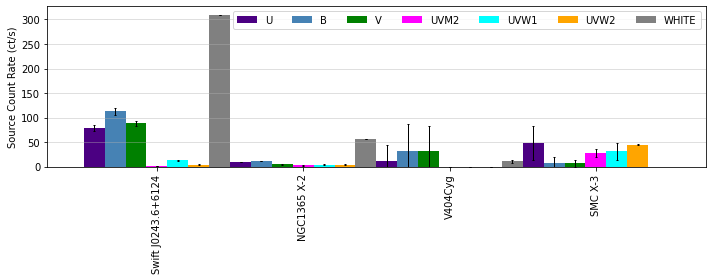

/tmp/ipykernel_703/162112234.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_filt['max'] = df_filt.max(axis=1)
/home/x1/.pyenv/versions/3.10.4/lib/python3.10/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/x1/.pyenv/versions/3.10.4/lib/python3.10/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


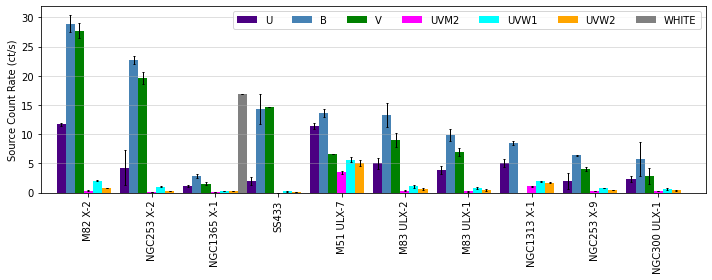

/tmp/ipykernel_703/162112234.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_filt['max'] = df_filt.max(axis=1)
/home/x1/.pyenv/versions/3.10.4/lib/python3.10/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/x1/.pyenv/versions/3.10.4/lib/python3.10/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


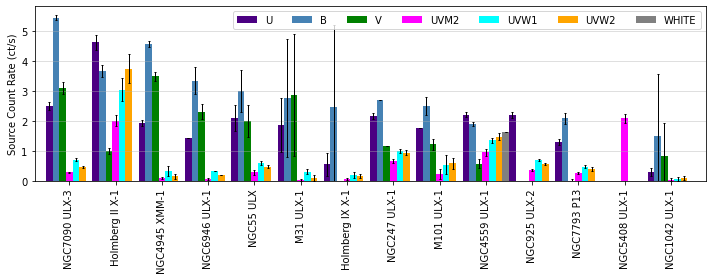

/tmp/ipykernel_703/162112234.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_filt['max'] = df_filt.max(axis=1)
/home/x1/.pyenv/versions/3.10.4/lib/python3.10/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/x1/.pyenv/versions/3.10.4/lib/python3.10/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


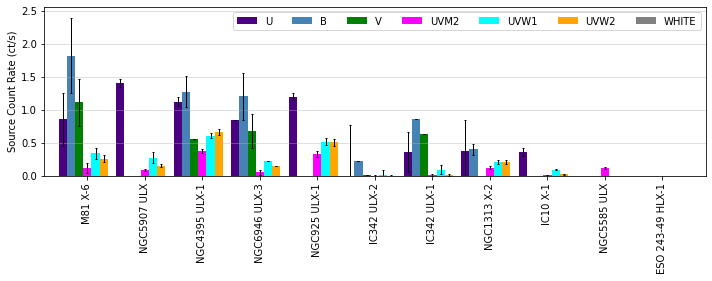

In [8]:
for i, n in enumerate([[0,4],[5,15],[16,30],[31,42]]):
    lo = n[0]
    hi = n[1]
    
    df_filt = df_uvot_rates2.copy()
    df_filt['max'] = df_filt.max(axis=1)
    df_filt = df_filt.set_index('readable_name')
    df_filt = df_filt.sort_values('max', ascending=False)
    df_filt = df_filt.iloc[lo:hi]

    df_uvot_rate_mu = df_filt[['U_mu', 'B_mu', 'V_mu', 'UVM2_mu','UVW1_mu','UVW2_mu','WHITE_mu']]
    df_uvot_rate_std = df_filt[['U_std', 'B_std', 'V_std', 'UVM2_std', 'UVW1_std', 'UVW2_std', 'WHITE_std']]
    df_uvot_rate_mu.columns = ['U','B','V','UVM2','UVW1','UVW2','WHITE']
    df_uvot_rate_std.columns = ['U','B','V','UVM2','UVW1','UVW2','WHITE']

    fig, ax = plt.subplots(1,1, figsize=(10,4), facecolor='white')
    df_uvot_rate_mu.plot.bar(ax=ax, yerr=df_uvot_rate_std, color=filter_colors, width=1.0, rot=90, error_kw=dict(lw=1, capsize=1, capthick=1))
    plt.grid(axis='y', alpha=0.5)
    ax.legend(loc='upper right', ncol=7)
    ax.set_xlabel('')
    ax.set_ylabel('Source Count Rate (ct/s)')
    ax.set_ylim(ymin=0)
    plt.tight_layout()
    

    #plt.ylim(0,10)
    plt.savefig(f'../figures/UVOT_rates_{i}.png', bbox_inches='tight')
    plt.savefig(f'../figures/UVOT_rates_{i}.pdf', bbox_inches='tight')
    plt.show()

/home/x1/.pyenv/versions/3.10.4/lib/python3.10/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/x1/.pyenv/versions/3.10.4/lib/python3.10/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


(0.0, 20.0)

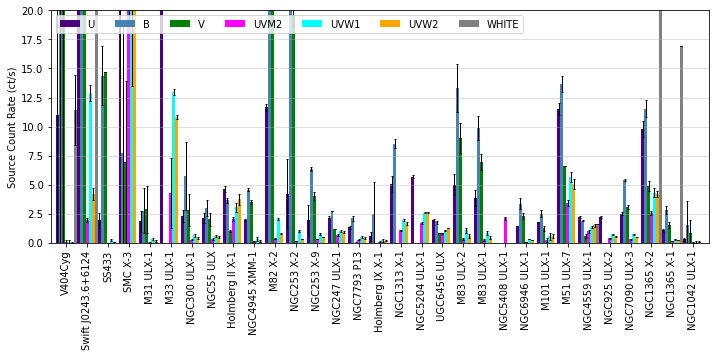

In [9]:
df_filt2 = df_uvot_rates2.set_index('readable_name').copy()
df_filt2 = df_filt2.loc[~df_filt2.index.isin(df_filt.index)]
df_uvot_rate_mu = df_filt2[['U_mu', 'B_mu', 'V_mu', 'UVM2_mu','UVW1_mu','UVW2_mu','WHITE_mu']]
df_uvot_rate_std = df_filt2[['U_std', 'B_std', 'V_std', 'UVM2_std', 'UVW1_std', 'UVW2_std', 'WHITE_std']]
df_uvot_rate_mu.columns = ['U','B','V','UVM2','UVW1','UVW2','WHITE']
df_uvot_rate_std.columns = ['U','B','V','UVM2','UVW1','UVW2','WHITE']


fig, ax = plt.subplots(1,1, figsize=(10,5), facecolor='white')

df_uvot_rate_mu.plot.bar(ax=ax, yerr=df_uvot_rate_std, color=filter_colors, width=1.0, rot=90, error_kw=dict(lw=1, capsize=1, capthick=1))
plt.grid(axis='y', alpha=0.5)
ax.legend(loc='upper left', ncol=7)
ax.set_xlabel('')
ax.set_ylabel('Source Count Rate (ct/s)')
plt.tight_layout()

plt.ylim(0,20)
#plt.savefig('../figures/UVOT_magnitudes.png')
#plt.savefig('../figures/UVOT_magnitudes.pdf')

In [10]:
df_filt2 = df_uvot_rates2.set_index('readable_name').copy()

In [11]:
df_filt2

,B_mu,B_std,U_mu,U_std,UVM2_mu,UVM2_std,UVW1_mu,UVW1_std,UVW2_mu,UVW2_std,V_mu,V_std,WHITE_mu,WHITE_std
readable_name,,,,,,,,,,,,,,
V404Cyg,32.361210,54.060543,11.031324,32.363201,0.056957,0.139804,0.035013,0.177903,0.008614,0.010944,31.132498,52.399990,11.443835,3.001585
Swift J0243.6+6124,112.672173,7.428699,78.891548,6.884930,1.940145,0.166541,12.897105,0.689746,4.186245,0.491218,88.141632,4.858161,310.098938,0.000000
SS433,14.362226,2.539846,1.916296,0.670869,-0.001671,0.001795,0.253760,0.080030,0.078837,0.013812,14.654023,0.000000,NaN,NaN
SMC X-3,7.749118,10.958908,48.590668,34.444344,27.596010,8.861449,31.101393,17.580549,44.313431,1.023777,6.958765,6.958765,NaN,NaN
IC10 X-1,NaN,NaN,0.356743,0.060841,0.007220,0.001027,0.093739,0.007742,0.020220,0.003595,NaN,NaN,NaN,NaN
M31 ULX-1,2.763927,1.970481,1.858824,0.897792,0.034187,0.023795,0.319108,0.081077,0.104800,0.086992,2.865085,2.041367,NaN,NaN
M33 ULX-1,NaN,NaN,36.617050,10.014011,4.254834,3.014695,13.008313,0.260614,10.844345,0.187248,NaN,NaN,NaN,NaN
NGC300 ULX-1,5.749470,2.913689,2.325779,0.518219,0.272381,0.039578,0.633738,0.134944,0.415267,0.069762,2.842844,1.366953,NaN,NaN
NGC55 ULX,2.995416,0.710179,2.105665,0.434492,0.291416,0.079409,0.595198,0.065790,0.485542,0.053163,1.997567,0.534348,NaN,NaN
